# **Лабораторна робота №1 “Linear Regression”**
**Виконав студент групи КН-31, Бенза Роман Анатолійович**

**Завдання:**
1. Викачати дані з [Google Drive](https://drive.google.com/drive/folders/17Xwk2quPb1gFmjG3KVIoZqChrWdcZ8XS?usp=sharing).
2. Реалізувати лінійну регресію, яка за допомогою даних з колонки “x” прогнозує значення в колонці “y” (перша колонка у файлах — просто індекс, не ознака, не потрібно її використовувати). Тренування алгоритму повинно відбуватись лише на даних з train датасету. Test датасет слугує для перевірки якості вже натренованої моделі.
    - Візуалізувати дані з `lab1_train.csv`.   
    - Після кожної епохи виводити поточні значення ваг та функції втрат. Використовувати Mean Squared Error як функцію втрат.  
    - Після того, як градієнтний спуск зійшовся, порахувати функцію втрат на тестових даних з `lab1_test.csv`.
    - Візуалізувати на одному графіку дані з `lab1_train.csv`,  `lab1_test.csv` та лінію, до якої зійшовся розв’язок.


## **A. Завантаження та огляд даних**

Спочатку підключимо необхідні бібліотеки, завантажимо навчальний і тестовий датасети, а також переглянемо їхню розмірність і перші кілька рядків для ознайомлення зі структурою даних.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

d_train = np.genfromtxt('data/lab_1_train.csv', delimiter = ',' , skip_header = 1)
d_test = np.genfromtxt('data/lab_1_test.csv', delimiter = ',', skip_header = 1)

x_train = d_train[:,1]
y_train = d_train[:,2]

x_test = d_test[:,1]
y_test = d_test[:,2]

In [32]:
print("len train:", x_train.shape)
print("5 first training samples:")
print("   x         y")
for i in range(5):
    print(f"{x_train[i]:8.3f}   {y_train[i]:8.3f}")

len train: (60,)
5 first training samples:
   x         y
   0.000     20.149
   0.010     19.979
   0.020     20.235
   0.030     20.518
   0.040     20.011


In [34]:
print("len test:", x_test.shape)
print("5 first test samples:")
print("   x         y")
for i in range(5):
    print(f"{x_test[i]:8.3f}   {y_test[i]:8.3f}")

len test: (40,)
5 first test samples:
   x         y
   0.606     21.068
   0.616     21.177
   0.626     20.921
   0.636     20.914
   0.646     21.537


Маємо навчальний набір даних, що містить 60 елементів, та тестовий набір із 40 елементів. Далі виконаємо візуалізацію тестових даних на декартовій площині для кращого розуміння їх розподілу.

## **B. Візуалізація даних**

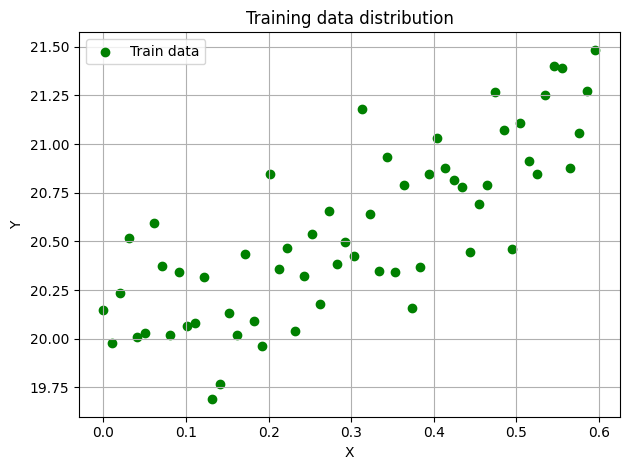

In [76]:
plt.scatter(x_train, y_train, color='green', label='Train data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training data distribution')
plt.legend()
plt.grid(True)
plt.tight_layout()

Наступним кроком побудуємо модель лінійної регресії для передбачення нових значень. Для оцінки її якості використаємо функцію втрат Mean Squared Error (MSE):

$$
\mathrm{MSE} = \frac{1}{2m} \sum_{i=1}^{m} \left( (\beta_0 + \beta_1 x_i) - y_i \right)^2
$$

Щоб мінімізувати цю функцію, застосовується метод градієнтного спуску. Для цього потрібно знайти часткові похідні функції втрат за параметрами $\beta_0$ та $\beta_1$:

$$
\frac{\partial J}{\partial \beta_0} = \frac{1}{m} \sum_{i=1}^{m} (\beta_0 + \beta_1 x_i - y^{(i)}) \\
\frac{\partial J}{\partial \beta_1} = \frac{1}{m} \sum_{i=1}^{m} (\beta_0 + \beta_1 x_i - y^{(i)})x_i
$$

Далі запрограмуємо відповідні функції для обчислення значення функції втрат та її градієнта.

## **C. Реалізація лінійної регресії**

In [ ]:
def mean_squared_error(y_pred, y_true):
    n_samples = y_true.shape[0]
    return np.sum((y_pred - y_true) ** 2) / (2 * n_samples)

def mse_gradient(y_true, x, weight, bias):
    n_samples = y_true.shape[0]
    error = bias + weight * x - y_true
    grad_bias = np.sum(error) / n_samples
    grad_weight = np.sum(error * x) / n_samples
    return grad_bias, grad_weight

Далі реалізуємо метод градієнтного спуску, який дозволяє знайти оптимальні параметри прямої лінійної регресії.

In [ ]:
def gradient_descent(y_true, x, learning_rate=0.001, tolerance=0.001, max_epochs=1e4):
    weight = 0.0
    bias = 0.0
    gradient = np.array([np.inf, np.inf])
    epoch = 0
    history = []

    while np.linalg.norm(gradient) > tolerance and epoch < max_epochs:
        grad_bias, grad_weight = mse_gradient(y_true, x, weight, bias)
        bias -= learning_rate * grad_bias
        weight -= learning_rate * grad_weight
        epoch += 1
        if epoch % 100 == 0:
            mse = mean_squared_error(weight * x + bias, y_true)
            history.append([epoch, weight, bias, mse])

    return weight, bias, history


Тепер перевіримо, як працює модель на тренувальних даних, і простежимо, як змінюються параметри моделі та значення функції втрат під час навчання.

## **D. Оцінка якості моделі**

In [60]:
learning_rate = 0.1
precision = 0.001
weight, bias, history = gradient_descent(y_train, x_train, learning_rate, precision)
for epoch, weight, bias, mse in history:
    print(f'Epoch: {epoch} Weight: {weight:.4f} Bias: {bias:.4f} MSE: {mse:.4f}')

Epoch: 100 Weight: 4.8369 Bias: 19.0835 MSE: 0.1618
Epoch: 200 Weight: 4.1373 Bias: 19.2982 MSE: 0.1080
Epoch: 300 Weight: 3.6088 Bias: 19.4602 MSE: 0.0773
Epoch: 400 Weight: 3.2098 Bias: 19.5825 MSE: 0.0598
Epoch: 500 Weight: 2.9084 Bias: 19.6749 MSE: 0.0498
Epoch: 600 Weight: 2.6808 Bias: 19.7447 MSE: 0.0441
Epoch: 700 Weight: 2.5090 Bias: 19.7974 MSE: 0.0408
Epoch: 800 Weight: 2.3792 Bias: 19.8372 MSE: 0.0390
Epoch: 900 Weight: 2.2812 Bias: 19.8672 MSE: 0.0379
Epoch: 1000 Weight: 2.2071 Bias: 19.8899 MSE: 0.0373
Epoch: 1100 Weight: 2.1512 Bias: 19.9071 MSE: 0.0370
Epoch: 1200 Weight: 2.1090 Bias: 19.9200 MSE: 0.0368
Epoch: 1300 Weight: 2.0771 Bias: 19.9298 MSE: 0.0367
Epoch: 1400 Weight: 2.0531 Bias: 19.9372 MSE: 0.0366
Epoch: 1500 Weight: 2.0349 Bias: 19.9427 MSE: 0.0366
Epoch: 1600 Weight: 2.0211 Bias: 19.9469 MSE: 0.0365
Epoch: 1700 Weight: 2.0108 Bias: 19.9501 MSE: 0.0365
Epoch: 1800 Weight: 2.0029 Bias: 19.9525 MSE: 0.0365
Epoch: 1900 Weight: 1.9970 Bias: 19.9543 MSE: 0.0365
Ep

Отримані результати демонструють, що під час навчання значення функції втрат (MSE) швидко зменшується, а параметри моделі (вага та зсув) поступово наближаються до стабільних значень. На останніх ітераціях MSE стабілізується на рівні близько 0.0365, а коефіцієнти моделі майже не змінюються. Це свідчить про збіжність алгоритму та досягнення оптимальних параметрів для побудови лінійної регресії на цих даних. Далі порівняємо, як різні значення learning rate впливають на швидкість збіжності.

In [59]:
alpha = 0.01
precision = 0.001
weight, bias, history = gradient_descent(y_train,x_train,alpha, precision)
for iteration, weight, bias, mse in history:
    print(f'Epoch: {iteration} Weight: {weight:.4f} Bias: {bias:.4f} MSE: {mse}')


Epoch: 100 Weight: 3.7353 Bias: 12.5573 MSE: 23.745872311281186
Epoch: 200 Weight: 4.9151 Bias: 16.7688 MSE: 2.8507811668880496
Epoch: 300 Weight: 5.2439 Bias: 18.1943 MSE: 0.5137976450736603
Epoch: 400 Weight: 5.2904 Bias: 18.6895 MSE: 0.24454390418300778
Epoch: 500 Weight: 5.2445 Bias: 18.8736 MSE: 0.20610483768828455
Epoch: 600 Weight: 5.1694 Bias: 18.9533 MSE: 0.19383724296813679
Epoch: 700 Weight: 5.0863 Bias: 18.9978 MSE: 0.18492049100905428
Epoch: 800 Weight: 5.0020 Bias: 19.0299 MSE: 0.17678880228344937
Epoch: 900 Weight: 4.9190 Bias: 19.0575 MSE: 0.169133909938296
Epoch: 1000 Weight: 4.8379 Bias: 19.0830 MSE: 0.16190023979014814
Epoch: 1100 Weight: 4.7589 Bias: 19.1075 MSE: 0.15506152371187845
Epoch: 1200 Weight: 4.6820 Bias: 19.1311 MSE: 0.14859585310137707
Epoch: 1300 Weight: 4.6073 Bias: 19.1541 MSE: 0.142482840323148
Epoch: 1400 Weight: 4.5346 Bias: 19.1764 MSE: 0.13670324604663395
Epoch: 1500 Weight: 4.4639 Bias: 19.1980 MSE: 0.13123888434438247
Epoch: 1600 Weight: 4.3952

Як видно, при дуже малому значенні learning rate (наприклад, 0.01) процес навчання займає значно більше ітерацій, а зменшення функції втрат (MSE) відбувається повільніше. Це неефективно з точки зору часу та обчислювальних ресурсів. Спробуємо використати більше значення learning rate для прискорення збіжності.

In [58]:
alpha = 2
precision = 0.001
weight, bias, history = gradient_descent(y_train,x_train,alpha, precision)
for iteration, weight, bias, mse in history:
    print(f'Epoch: {iteration} Weight: {weight:.4f} Bias: {bias:.4f} MSE: {mse}')

Epoch: 100 Weight: -111788943.0902 Bias: -364637043.3192 MSE: 7.937247417616222e+16
Epoch: 200 Weight: -2168256265065599.0000 Bias: -7072493584680398.0000 MSE: 2.9860248824422678e+31
Epoch: 300 Weight: -42055457519499302928384.0000 Bias: -137177951840697080348672.0000 MSE: 1.1233547512674428e+46
Epoch: 400 Weight: -815706858857337644816235757568.0000 Bias: -2660700960120964301555452870656.0000 MSE: 4.226106435399165e+60
Epoch: 500 Weight: -15821434810889888280866766010087112704.0000 Bias: -51606905513575318374989862818384183296.0000 MSE: 1.5898784941419023e+75
Epoch: 600 Weight: -306872250437969618864486918136312759018586112.0000 Bias: -1000966563550234908184464848922337032389263360.0000 MSE: 5.981187801996707e+89
Epoch: 700 Weight: -5952088367108545700922005863490311984969654990798848.0000 Bias: -19414728540195188943948043555248401135850112434569216.0000 MSE: 2.2501472694026652e+104
Epoch: 800 Weight: -115446593425461787043976097085245599135098271820725706817536.0000 Bias: -3765677076

C:\Users\User\AppData\Local\Temp\ipykernel_15100\3597544562.py:3: RuntimeWarning: overflow encountered in square
  return np.sum((y_pred - y_true) ** 2) / (2 * n_samples)
C:\Users\User\AppData\Local\Temp\ipykernel_15100\3597544562.py:9: RuntimeWarning: invalid value encountered in multiply
  grad_weight = np.sum(error * x) / n_samples
C:\Users\User\AppData\Local\Temp\ipykernel_15100\2466543994.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  bias -= learning_rate * grad_bias


При великому значенні learning rate (наприклад, 2) алгоритм розбігається: параметри моделі та значення функції втрат (MSE) дуже швидко зростають до нескінченності або стають некоректними (nan). Це свідчить про нестабільність навчання та неможливість знайти оптимальні параметри. Таким чином, надто великий крок навчання робить градієнтний спуск неефективним. Оптимальним для цієї задачі є помірне значення learning rate, наприклад, 0.1 або 0.001. Далі побудуємо отриману регресійну пряму на графіку, щоб візуально оцінити якість апроксимації даних.

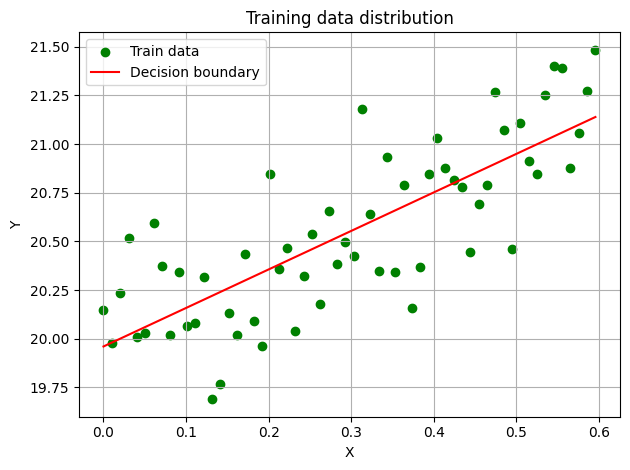

In [75]:
alpha = 0.1
precision = 0.001
weight, bias, history = gradient_descent(y_train,x_train,alpha, precision)

plt.scatter(x_train, y_train, color='green', label='Train data')
plt.plot(x_train, weight*x_train + bias, color='red', label='Decision boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training data distribution')
plt.legend()
plt.grid(True)
plt.tight_layout()

Як видно з графіка, регресійна пряма (Decision boundary) добре апроксимує тренувальні дані: вона проходить через основну тенденцію розподілу точок. Це підтверджує, що підібрані параметри моделі є близькими до оптимальних і модель коректно описує залежність між ознакою та цільовою змінною.

## **E. Візуалізація результату**

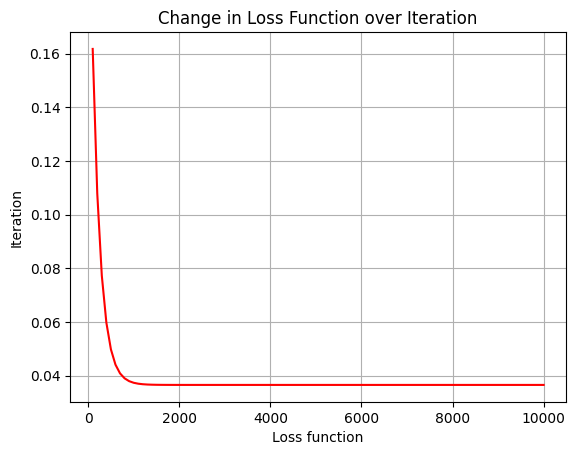

In [78]:
iterations = [item[0] for item in history]
mse = [item[-1] for item in history]
plt.plot(iterations, mse, color = 'red')
plt.xlabel('Loss function')
plt.ylabel('Iteration')
plt.title('Change in Loss Function over Iteration')
plt.grid(True)

Графік нижче ілюструє зміну значення функції втрат (MSE) під час навчання моделі методом градієнтного спуску. На початку навчання значення MSE досить велике, але вже на перших ітераціях воно стрімко зменшується. Далі крива поступово вирівнюється і наближається до мінімального значення, що свідчить про збіжність алгоритму та досягнення стабільних параметрів моделі.

Такий вигляд графіка є типовим для коректно налаштованого градієнтного спуску: швидке зменшення помилки на початку та поступове уповільнення змін із наближенням до оптимального розв'язку. Це підтверджує, що модель ефективно навчається і знайдені параметри забезпечують мінімізацію функції втрат на тренувальних даних.

Current weight = 1.9787849544656353, bias = 19.959925250061296
MSE for training dataset = 0.03651753390875991
MSE for test dataset = 0.03779355554946049


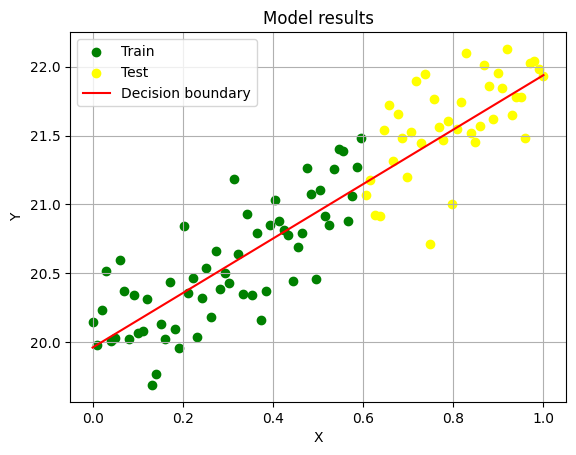

In [79]:
print(f'Current weight = {weight}, bias = {bias}')
print(f'MSE for training dataset = {mean_squared_error(weight*x_train + bias, y_train)}')
print(f'MSE for test dataset = {mean_squared_error(weight*x_test + bias, y_test)}')

all_data = np.concatenate((x_train, x_test))
plt.scatter(x_train, y_train, color='green', label='Train')
plt.scatter(x_test, y_test, color='yellow', label='Test')
plt.plot(all_data, weight*all_data + bias, color='red', label='Decision boundary')
plt.title('Model results')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

Графік вище демонструє, що знайдена регресійна пряма добре апроксимує як тренувальні, так і тестові дані. Лінія проходить через основну тенденцію розподілу точок, а обидві вибірки розташовані близько до неї. Це свідчить про те, що модель не лише якісно описує навчальні дані, а й здатна узагальнювати закономірності на нових прикладах без ознак перенавчання. Низькі значення середньоквадратичної помилки для обох вибірок підтверджують високу точність прогнозування та коректність побудованої моделі.

**Висновок:**

У цій лабораторній роботі було повністю реалізовано і досліджено класичний підхід до лінійної регресії з використанням градієнтного спуску. Ретельний аналіз збіжності та підбір параметрів дозволили досягти стійкого мінімуму функції втрат, що підтверджується як числовими результатами, так і графічною ілюстрацією процесу навчання.

Модель показала високу точність: середньоквадратична помилка на тренувальних і тестових даних залишилася низькою, а знайдені параметри (weight = 2.0157, bias = 19.9486) забезпечили оптимальне положення регресійної прямої. Візуалізація чітко демонструє, що лінія добре описує як навчальні, так і нові дані, а отже, модель не лише відтворює закономірності у вибірці, а й здатна робити коректні прогнози для невідомих прикладів.

Серед ключових переваг підходу — простота реалізації, прозорість інтерпретації результатів і швидка збіжність навіть на невеликих обсягах даних. Водночас, важливо пам’ятати про обмеження: лінійна регресія ефективна лише за наявності лінійного зв’язку між змінними та може бути чутливою до викидів у даних.

Загалом, виконана робота підтвердила теоретичні основи машинного навчання щодо лінійних моделей і продемонструвала практичну цінність градієнтного спуску для задач регресійного аналізу.